# Linear Regression

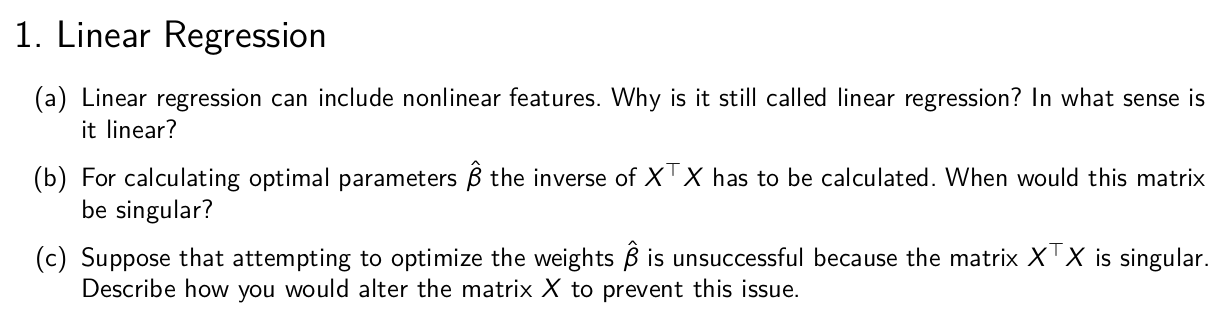

(a) Linear represents a linear relastionship between the input feature and the target label. The effect of each feature is constant and additive. If the inputs are nonlinear, the input feature as object description should be derived from the original inputs. By introducing the nonlinear input features, the model can represent nonlinear relationships.
<br>
(b) $X^{T}X$ is singular， when the columes or rows of X are linearly dependent, which means one or more variables are exact linear combination of the others.
<br>
(c) If the matrix $X^{T}X$ is singular, it is not possible to calaulate the inverse. And here are some possible approaches to alter the matrix $X$:<br>
 $ \qquad$ (1) remove linearly dependent columes.<br>
 $ \qquad$ (2) collect more diverse data.<br>
 $ \qquad$ (3) preprocess the data: correlation analysis, feature nomalization and standardization.<br>

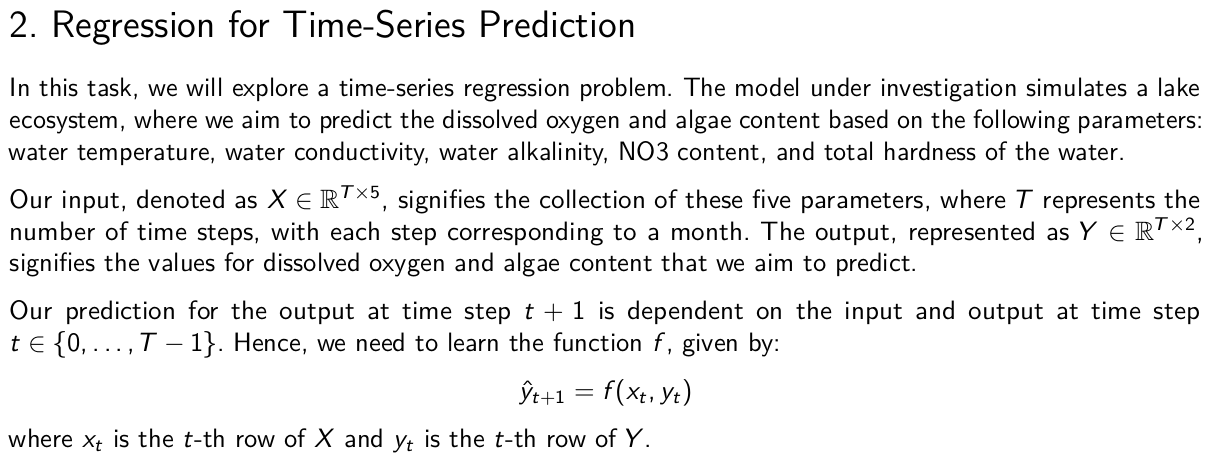

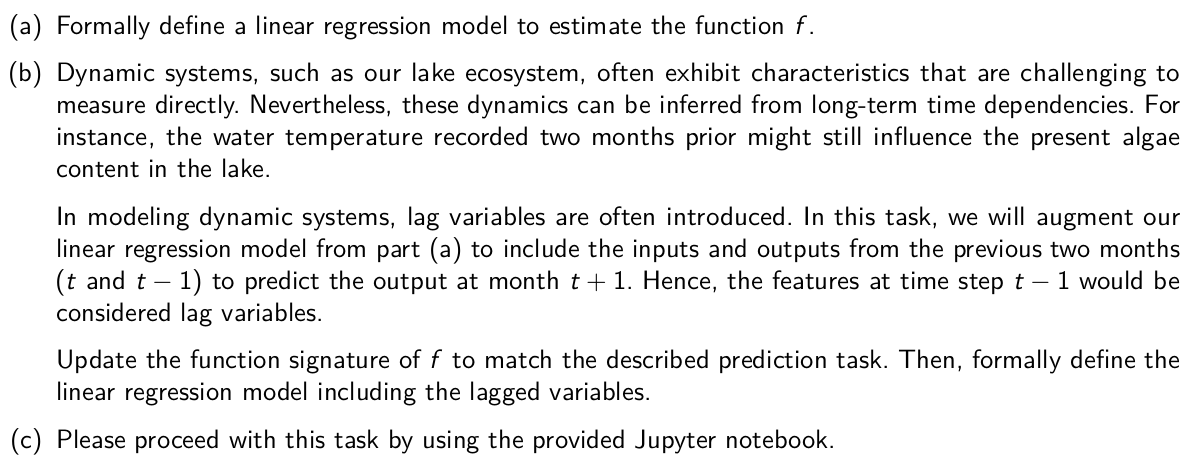

(a) We aim to estimate the function f, which predicts the output at time step $t+1$ based on input and output at time step $t$.<br>
The linear regression model can be defined as: $$\hat{y}_{t+1} = \vec{x}_t^{T}\beta$$
Where:<br>
    $\hat{y}_{t+1}$ is the predicted output at time step $t+1$, <br>
    $\beta \in \mathbb{R}^{6 \times 2}$ is the regression coefficents to be estimated by given $X$ and $Y$, <br>
    $\vec{x}_t^{T} = [1, x_{t,1}, ..., x_{t,5}]^{T} \in \mathbb{R}^{6} $ is the input parameter at time step $t$,<br>
After optimizing loss function, $\beta$ is $\hat{\beta}^{ls} = (X^{T}X)^{-1}X^{T}Y$, then the linear regression model is: $$\hat{y}_{t+1} = \vec{x}_t^{T}\beta = \vec{x}_t^{T}(X^{T}X)^{-1}X^{T}Y$$ 

(b) The new function $f$ is: $$\hat{y}_{t+1} = f(\vec{x}_t^{T}, \vec{x}_{t-1}^{T}, y_{t}, y_{t-1})$$
The linear regression model is:
$$\hat{y}_{t+1} = \vec{x}_{t}^{T}\beta_{1}+\vec{x}_{t-1}^{T}\beta_{2}$$
where:<br>
$\vec{x}_t^{T}$ represents the t-th row of X,<br>
$\hat{y}_{t}$ represents the t-th row of Y,<br>
$\hat{y}_{t+1}$ represents the predicted values for the output variables at time step $t+1$,<br>
$\beta \in \mathbb{R}^{6 \times 2}$ is the regression coefficents to be estimated by given $X$ and $Y$

## Task 2: Regression for Time-Series Prediction

Make sure the provided `lake.dat` file is in the same directory as the Jupyter notebook.

You can find the original data including references here: [DaISy - Data of a simulation of the western basin of Lake Erie](https://homes.esat.kuleuven.be/~smc/daisy/daisydata.html).

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def load_lake_data():
    with open('lake.dat') as f:
        data = np.loadtxt(f)
    X = data[:, 6:11]
    Y = data[:, 23:25]
    return X, Y

def train_test_split(X, Y, train_fraction):
    cutoff_idx = int(train_fraction * X.shape[0])
    X_train, Y_train = X[:cutoff_idx], Y[:cutoff_idx]
    X_test, Y_test = X[cutoff_idx:], Y[cutoff_idx:]

    return X_train, Y_train, X_test, Y_test


X_train, Y_train, X_test, Y_test = train_test_split(*load_lake_data(), train_fraction=0.7)
print(f'Train samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}')
# print(X_train.shape)

Train samples: 39, Test samples: 18
(39, 5)


Training data is stored in `X_train` and `Y_train`. Test data is stored in `X_test` and `Y_test`.

1\) Create a plot that shows all inputs and outputs of the training dataset over time. For each variable a separate subplot should be created. Time should be displayed along the x-axis, while the value of each variable should be displayed along the y-axis.

*Hint:* Use `plt.subplots(n, sharex=True)` to create `n` plots that are synchronized along the x-axis.

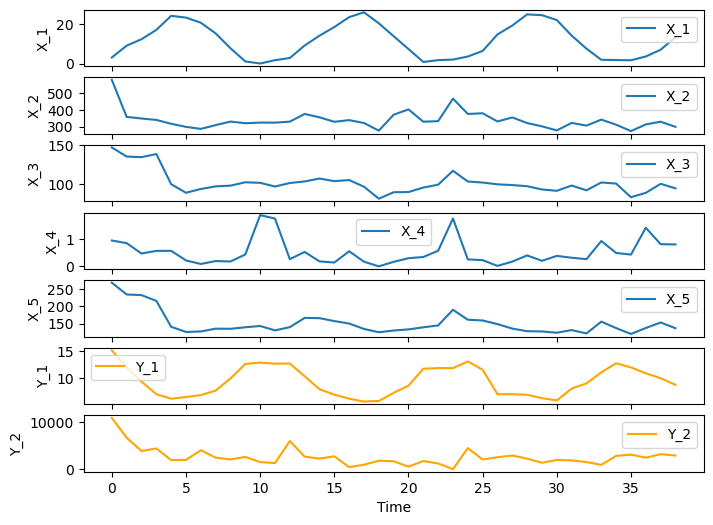

In [19]:
# Your code here
num = X_train.shape[1] + Y_train.shape[1]
fig, axs = plt.subplots(num, sharex=True)

fig.set_size_inches(8,6)

for t in range(X_train.shape[1]):
    axs[t].plot(X_train[:, t], label = F'X_{t + 1}')
    axs[t].set_ylabel(F'X_{t + 1}')
    axs[t].legend()

for t in range(Y_train.shape[1]):
    axs[X_train.shape[1] + t].plot(Y_train[:,t], label = F'Y_{t + 1}', color = 'orange' )
    axs[X_train.shape[1] + t].set_ylabel(F'Y_{t + 1}')
    axs[X_train.shape[1] + t].legend()
    
axs[-1].set_xlabel(F'Time')

plt.show()

2\) The `make_features` takes as input a matrix of inputs `X` and a matrix of outputs `Y`, as well as the arguments `feature_type` and `lag`.
It computes a features used as input for a linear regression.


`X` has the shape `(T, 5)` and `Y` has the shape `(T, 2)` where `T` is a number of time steps.
`feature_type` is a string with either value `lin` or `quad` whether only linear features or also quadratic features should be computed. `lag` is a boolean that determines whether the lag variables for `t-1`should be included.


If `lag` is False, the returned feature matrix has shape `(T, D)` where `D` depends on the choice of `feature_type`.
For `feature_type=lin` and `lag=False`, `D` equals `5+2+1`, for `feature_type=lin` and `lag=True`, `D` equals `2*(5+2)+1`.
If `lag` is True, the returned feature matrix has shape `(T-1, D)`, since the additional lag variable prevents the creation of a feature for time step $t=0$.


Extend the `make_features` method to also compute quadratic features (`ftype = 'quad'`) for both `lag=False` and `lag=True`.


In [86]:
def make_features(X, Y, feature_type='lin', lag=False):
    if feature_type == 'lin':
        if lag:
            Phi = np.hstack((
                np.ones((X.shape[0]-1, 1)), # bias/intercept term
                X[1:], # x_t
                X[:-1], # x_{t-1}
                Y[1:], # y_t
                Y[:-1] # y_{t-1}
            ))
        else:
            Phi = np.hstack((
                np.ones((X.shape[0], 1)), # bias/intercept term
                X, # x_t
                Y # y_t
            ))
    elif feature_type == 'quad':
        # Your code here
        
        # create quad X and quad Y
        for i in range(X.shape[0]):
            B = np.outer(X[i], X[i])  # get matrix of X_iX_j
            # print(B)
            
            # get elements of X_iX_j then flatten them into an array
            C = np.triu(B, k = 0)     
            # print(C)
            obs_C = C.ravel()[np.flatnonzero(C)]
            # print(obs_C)
            # build quadratic feature matrix except for element "1" in each row vector 
            if i == 0:
                X_quad = np.array([X[i]])
                X_quad = np.append(X_quad, [obs_C], axis = 1)
            # print(X_quad)
            else:
                # print(obs_C)
                temp_C = np.array([X[i]])
                obs_C = np.append(temp_C, [obs_C], axis = 1)
                X_quad = np.append(X_quad, obs_C, axis = 0)
                #print(X_qual)
            
        for i in range(Y.shape[0]):
            G = np.outer(Y[i], Y[i])
            # print(G)
            L = np.triu(G, k = 0)
            # print(L)
            obs_L = L.ravel()[np.flatnonzero(L)]
            # print(obs_L)
            if i == 0:
                Y_quad = np.array([Y[i]])
                Y_quad = np.append(Y_quad, [obs_L], axis = 1)
                # print(Y_quad)
            else:
            # print(obs_L)
                temp_L = np.array([Y[i]])
                obs_L = np.append(temp_L, [obs_L], axis = 1)
                Y_quad = np.append(Y_quad, obs_L, axis = 0)
            # print(Y_qual)

        # print(F'X_quad:{X_quad}')
        # print(F'Y_quad:{Y_quad}')
        print(F'X_quadShape:{X_quad.shape}')
        print(F'Y_quadShape:{Y_quad.shape}')
              
#         print(X_quad.shape[0])
#         print(Y_quad.shape[0])
        
        if lag:
            Phi = np.hstack((
               np.ones((X.shape[0] - 1, 1)),
#                X[1:],
#                X[:-1],
               X_quad[1:],
               X_quad[:-1],
#                Y[1:],
#                Y[:-1],
               Y_quad[1:],
               Y_quad[:-1]
            ))
        
        else:
            Phi = np.hstack((
            np.ones((X.shape[0], 1)),
            #X
            X_quad,
            #Y,
            Y_quad
            ))
            
        # raise NotImplementedError()
    else:
        raise ValueError(f'feature_type is not implemented for {feature_type}')
    
    print(Phi.shape)
    return Phi

# test whether the dimension is correct
make_features(X_train, Y_train, feature_type = 'quad', lag = False)
make_features(X_train, Y_train, feature_type = 'quad', lag = True)


X_quadShape:(39, 20)
Y_quadShape:(39, 5)
(39, 26)
X_quadShape:(39, 20)
Y_quadShape:(39, 5)
(38, 51)


array([[1.00000000e+00, 9.03670000e+00, 3.58320000e+02, ...,
        2.28100609e+02, 1.63414460e+05, 1.17072400e+08],
       [1.00000000e+00, 1.22610000e+01, 3.48710000e+02, ...,
        1.41800464e+02, 7.91858184e+04, 4.42198400e+07],
       [1.00000000e+00, 1.69550000e+01, 3.40080000e+02, ...,
        8.69966598e+01, 3.59274417e+04, 1.48371336e+07],
       ...,
       [1.00000000e+00, 3.60140000e+00, 3.12960000e+02, ...,
        1.42563600e+02, 3.70390740e+04, 9.62302441e+06],
       [1.00000000e+00, 7.00390000e+00, 3.29400000e+02, ...,
        1.18069956e+02, 2.66162670e+04, 6.00005025e+06],
       [1.00000000e+00, 1.33510000e+01, 2.98560000e+02, ...,
        9.92155445e+01, 3.18543186e+04, 1.02272040e+07]])

$d = 5$, each row vector in $X_{quad}$, has the dimension of $d+\frac{d(d+1)}{2} = 20$, which corresponds to the "X_quadShape" above.(if don't add 1 for element "1") <br>
For the dimension of $Phi$ when $lag=True$, it has shape $(T=T-1=38, D=2\times(15+5+3+2)+1=51)$.